# Tensorflow tutorial #01
# Simple Linear Model

## goal
1. download mnist datasets  
2. understand optimizer 
3. using matplotlib  

## imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix

In [ ]:
tf.__version__

## load data 并保存在 datasets/mnist.pickle文件中

In [2]:
import pickle

In [3]:
data = tf.keras.datasets.mnist.load_data()

In [4]:
(x_train,y_train),(x_test,y_test) = data

In [5]:
x_test = x_test / 255.0
x_train = x_train / 255.0

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
mnist = {}
mnist["data"] = data
mnist["train_size"]=60000
mnist["x_train_shape"] = (60000, 28, 28)
mnist["y_train_shape"] = (60000,)

mnist["test_size"]=10000
mnist["x_test_shape"] = (10000, 28, 28)
mnist["y_test_shape"] = (10000,)

mnist["num_classes"]=10
mnist["img_shape"]=(28,28)
mnist["img_size_flat"]= np.prod(mnist["img_shape"])

In [9]:
with open("../../datasets/mnist.pickle","wb") as f:
    pickle.dump(mnist,f)

In [10]:
print("Size of:")
print("Training-set: ",mnist["train_size"])
print("Testing-set: ",mnist["test_size"])

Size of:
Training-set:  60000
Testing-set:  10000


下次用的可直接用
` 
with open("../../datasets/mnist.pickle","rb") as f:
    pickle.load(f)
`

## 查看 单个数据的shape

In [11]:
img_shape = mnist["img_shape"]

In [12]:
img_size_flat = np.prod(img_shape)

In [13]:
num_classes = mnist["num_classes"]

In [14]:
print("Imga shape: ",img_shape)
print("Imgae size: ",img_size_flat)
print("Number of classes: ",num_classes)

Imga shape:  (28, 28)
Imgae size:  784
Number of classes:  10


## one-hot encoding

In [15]:
y_train_cls = y_train
y_train = tf.keras.utils.to_categorical(y_train_cls)

y_test_cls = y_test
y_test = tf.keras.utils.to_categorical(y_test_cls)

In [16]:
x_train = x_train.reshape(-1,img_size_flat)
x_test = x_test.reshape(-1,img_size_flat)

In [17]:
y_train.shape

(60000, 10)

In [18]:
y_train_cls.shape

(60000,)

## helper function for plotting images

In [126]:
def plot_images(images,cls_true,cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    fig, axes = plt.subplots(3,3,figsize=(10,10))
    fig.subplots_adjust(hspace=0.2,wspace=0.4)
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(img_shape),cmap="binary")
        
        if cls_pred is None:
            xlabel = "True:{0}".format(cls_true[i])
        else:
            xlabel = "True:{0}\n Pred:{1}".format(cls_true[i],cls_pred[i])
            
        ax.set_xlabel(xlabel)
        
        ax.set_xticks([])
        ax.set_yticks([])
        
    plt.show()

## plot a few images to see if data is correct

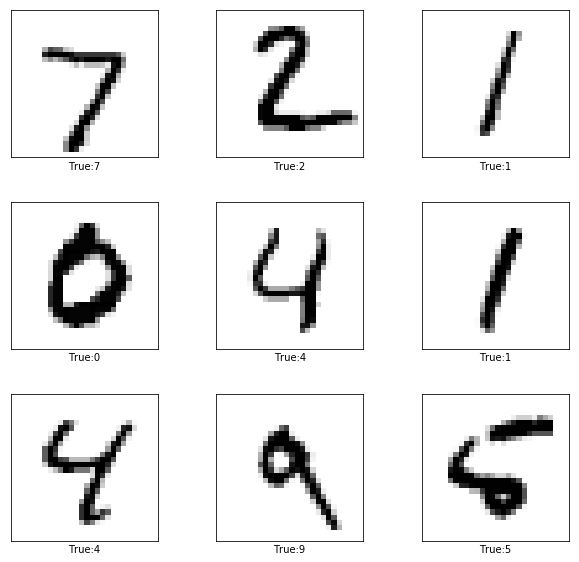

In [127]:
images = x_test[0:9]

cls_true = y_test_cls[0:9]

plot_images(images,cls_true)

## tensorflow graph

In [59]:
x = tf.placeholder(tf.float32,[None,img_size_flat])
y_true = tf.placeholder(tf.float32,[None,num_classes])
y_true_cls = tf.placeholder(tf.int64,[None])

In [60]:
weights = tf.Variable(tf.random_normal(shape=(img_size_flat,num_classes),\
                                       stddev= 0.1))
biases = tf.Variable(tf.random_normal(shape=(num_classes,),\
                                       stddev= 0.1))

## model

In [61]:
logits = tf.matmul(x,weights) + biases

In [62]:
y_pred = tf.nn.softmax(logits)
y_pred_cls = tf.argmax(y_pred,axis=1)

## cost function and optimize

In [63]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,\
                                                          labels=y_true)

In [64]:
cost = tf.reduce_mean(cross_entropy)

In [65]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)

## performance measures

In [66]:
correct_prediction = tf.equal(y_pred_cls, y_true_cls)

In [67]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

## tensorflow run

In [68]:
session = tf.Session()

In [69]:
session.run(tf.global_variables_initializer())

## helper function to perform optimization iterations

In [70]:
batch_size = 100

In [71]:
def next_batch(batch_size):
    idx = np.random.randint(low=0,high = mnist["train_size"],size=batch_size )
    x_batch = x_train[idx]
    y_batch = y_train[idx]
    y_batch_cls = y_train_cls[idx]
    return x_batch,y_batch,y_batch_cls

In [72]:
def optimize(num_iterations):
    for i in range(num_iterations):
        x_batch,y_batch,y_batch_cls = next_batch(batch_size)
        
        feed_dcit_train = {x:x_batch,\
                         y_true:y_batch,\
                         }
        
        session.run(optimizer,feed_dict=feed_dcit_train)

## helper functions to show performance

In [73]:
feed_dict_test = {x:x_test,\
                 y_true:y_test,\
                  y_true_cls:y_test_cls}

In [74]:
def print_accuracy():
    acc = session.run(accuracy,feed_dict=feed_dict_test)
    print("Accuracy on test set:{0:.1%}".format(acc))

In [75]:
def print_confusion_matrix():
    cls_true = y_test_cls
    cls_pred = session.run(y_pred_cls,feed_dict=feed_dict_test)
    cm = confusion_matrix(y_true=cls_true,y_pred=cls_pred)
    
    print(cm)
    
    plt.imshow(cm,interpolation="nearest",cmap=plt.cm.Blues)
    
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    
    plt.show()

In [95]:
np.set_printoptions(precision=1)

In [114]:
def plot_example_errors():
    correct,cls_pred,_y_pred = session.run([correct_prediction, y_pred_cls,y_pred],\
                                  feed_dict=feed_dict_test)
    
    incorrect = (correct == False)
    
    images = x_test[incorrect]
    
    cls_pred = cls_pred[incorrect]
    
    cls_true = y_test_cls[incorrect]
    
    true_test = y_test[incorrect]
    pred_test = _y_pred[incorrect]
    
    plot_images(images[0:9],cls_true[0:9],cls_pred[0:9])
    print("=="*30)
    plot_images(images[0:9],true_test[0:9],pred_test[0:9])

## helper function to plot the model weights

In [41]:
def plot_weights():
    w = session.run(weights)
    w_min = np.min(w)
    w_max = np.max(w)
    
    print(w_min,w_max)
    
    fig, axes = plt.subplots(3,4)
    fig.subplots_adjust(hspace=0.3,wspace=0.3)
    
    for i, ax in enumerate(axes.flat):
        if i < num_classes:
            image = w[:,i].reshape(img_shape)
            
            ax.set_xlabel("Weights:{0}".format(i))
            
            ax.imshow(image,vmin=w_min,vmax=w_max,cmap="seismic")
            
        ax.set_xticks([])
        ax.set_yticks([])
        
        
    plt.show()    

## performance before any optimization

In [77]:
print_accuracy()

Accuracy on test set:8.2%


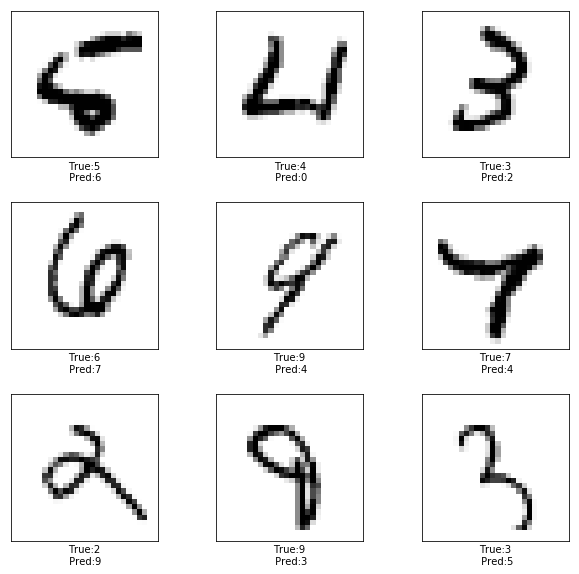

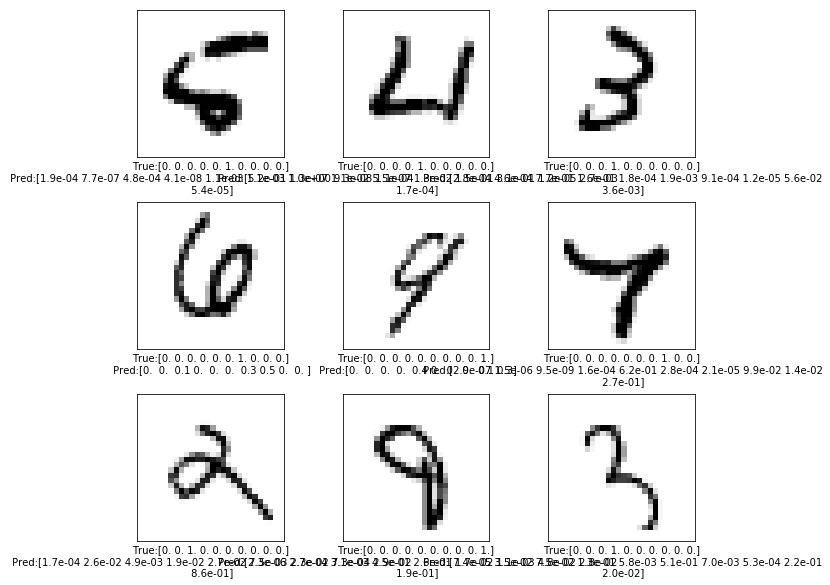

In [128]:
plot_example_errors()

In [116]:
optimize(1)

In [117]:
print_accuracy()

Accuracy on test set:16.1%


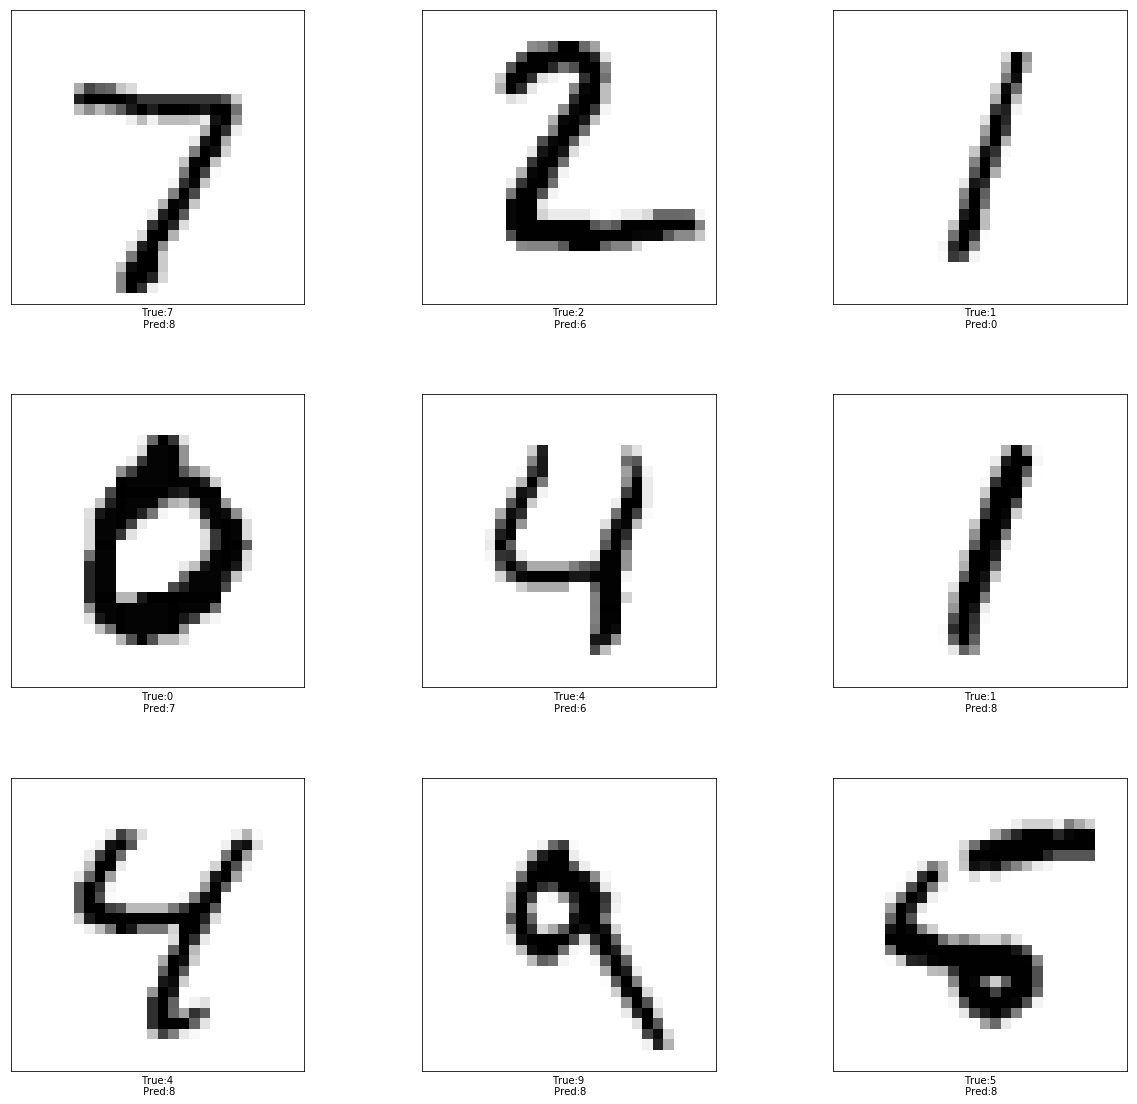

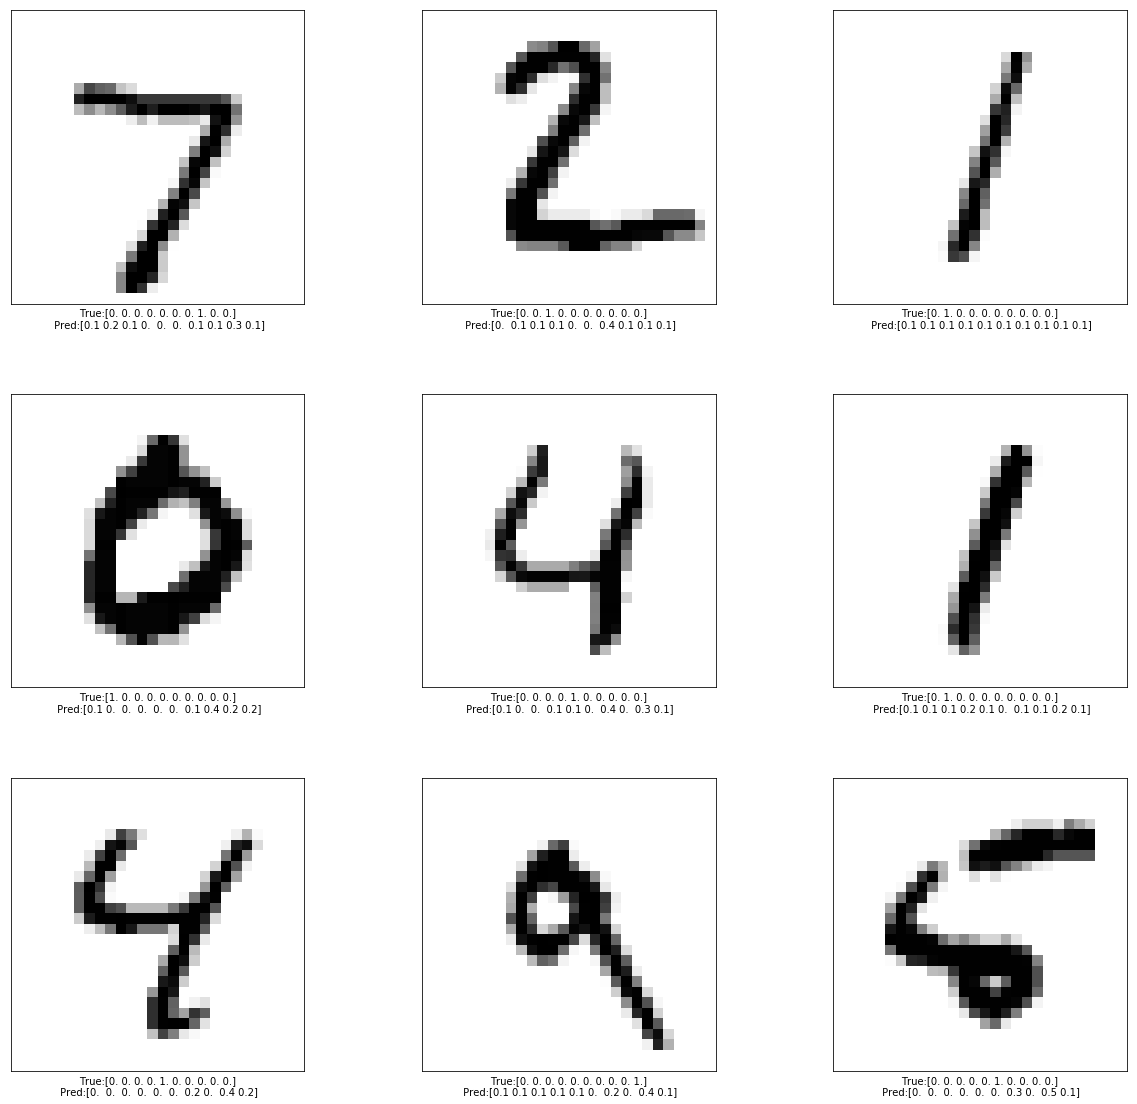

In [118]:
plot_example_errors()

-0.3766405 0.34865147


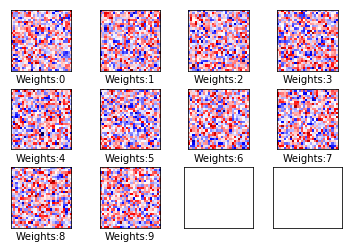

In [119]:
plot_weights()

In [120]:
optimize(9)
print_accuracy()

Accuracy on test set:72.5%


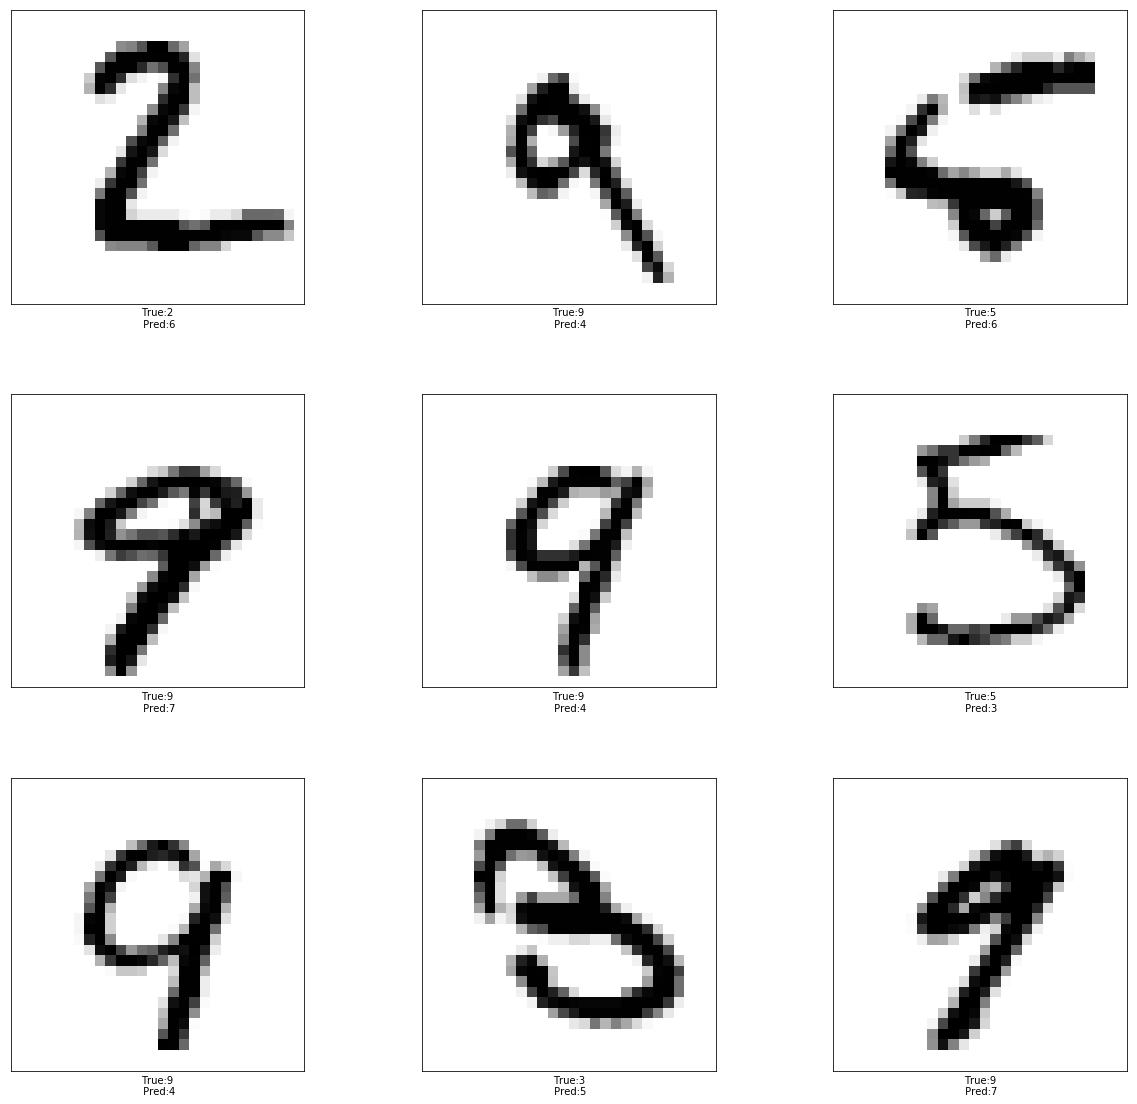

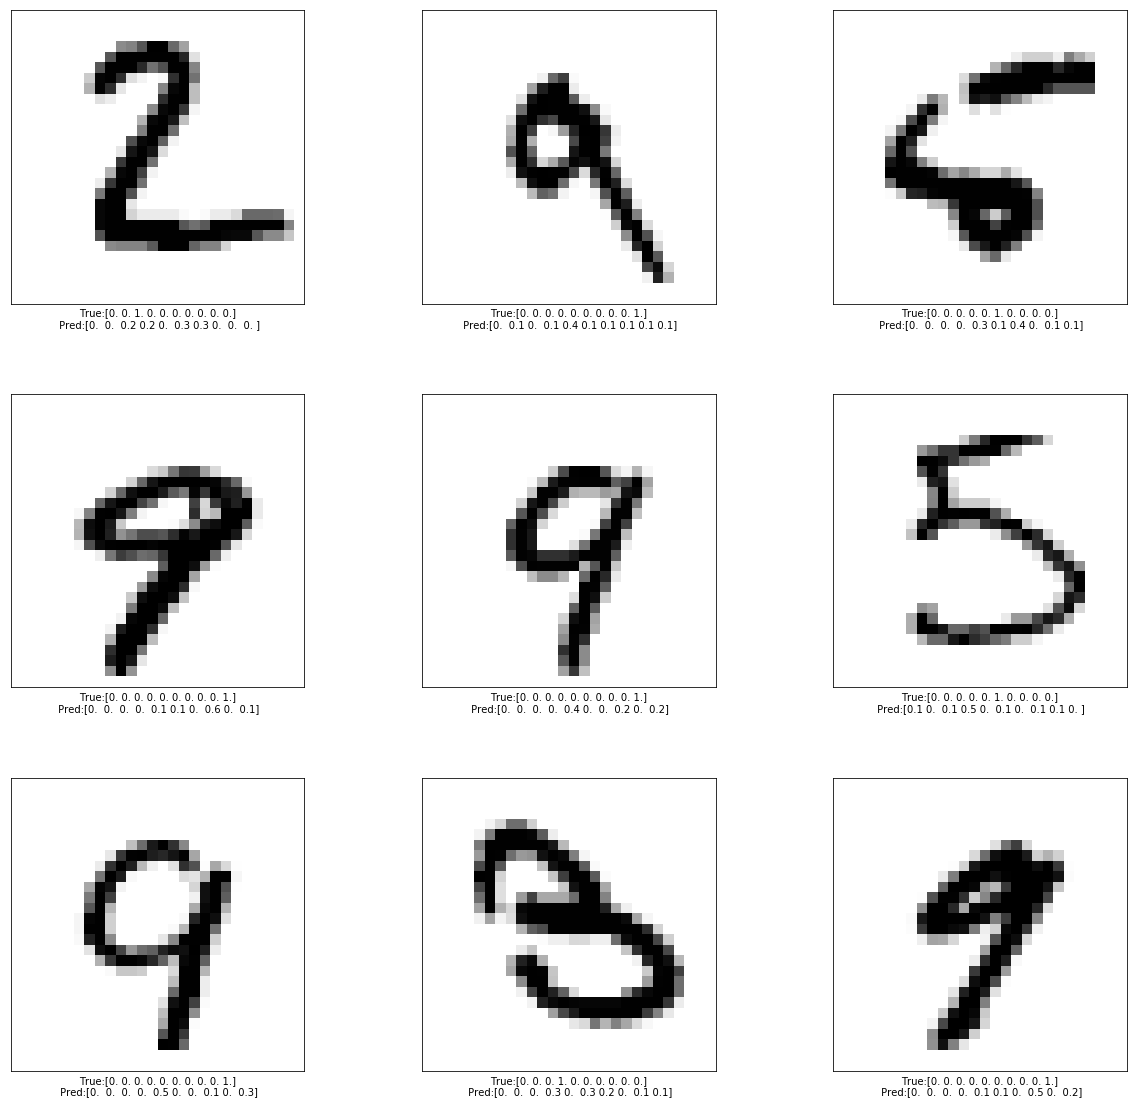

In [121]:
plot_example_errors()

-0.39354008 0.3866633


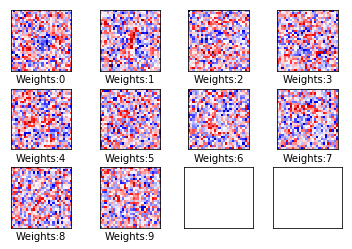

In [50]:
plot_weights()

In [122]:
optimize(990)
print_accuracy()

Accuracy on test set:91.5%


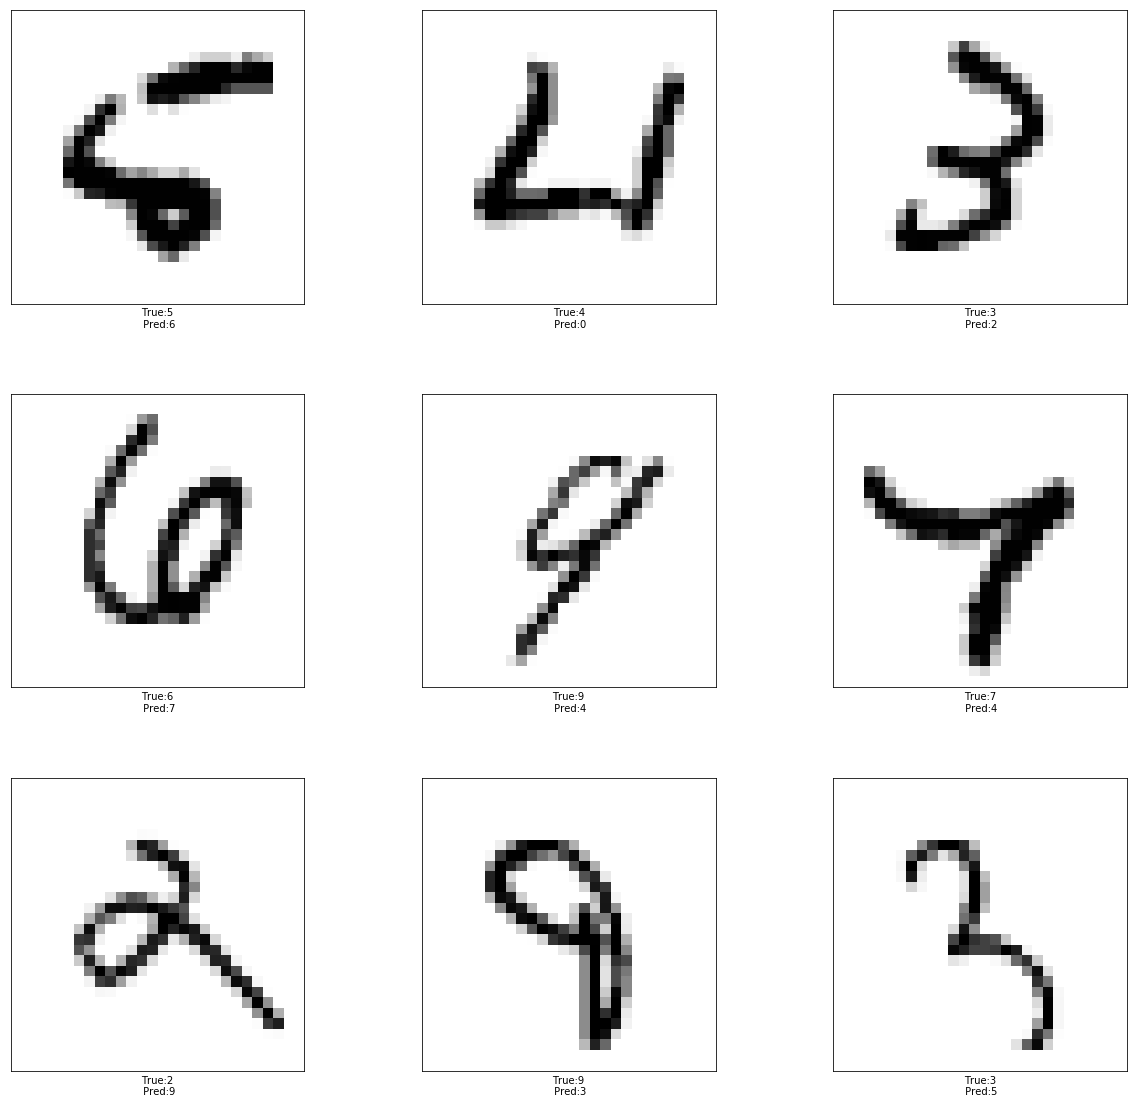

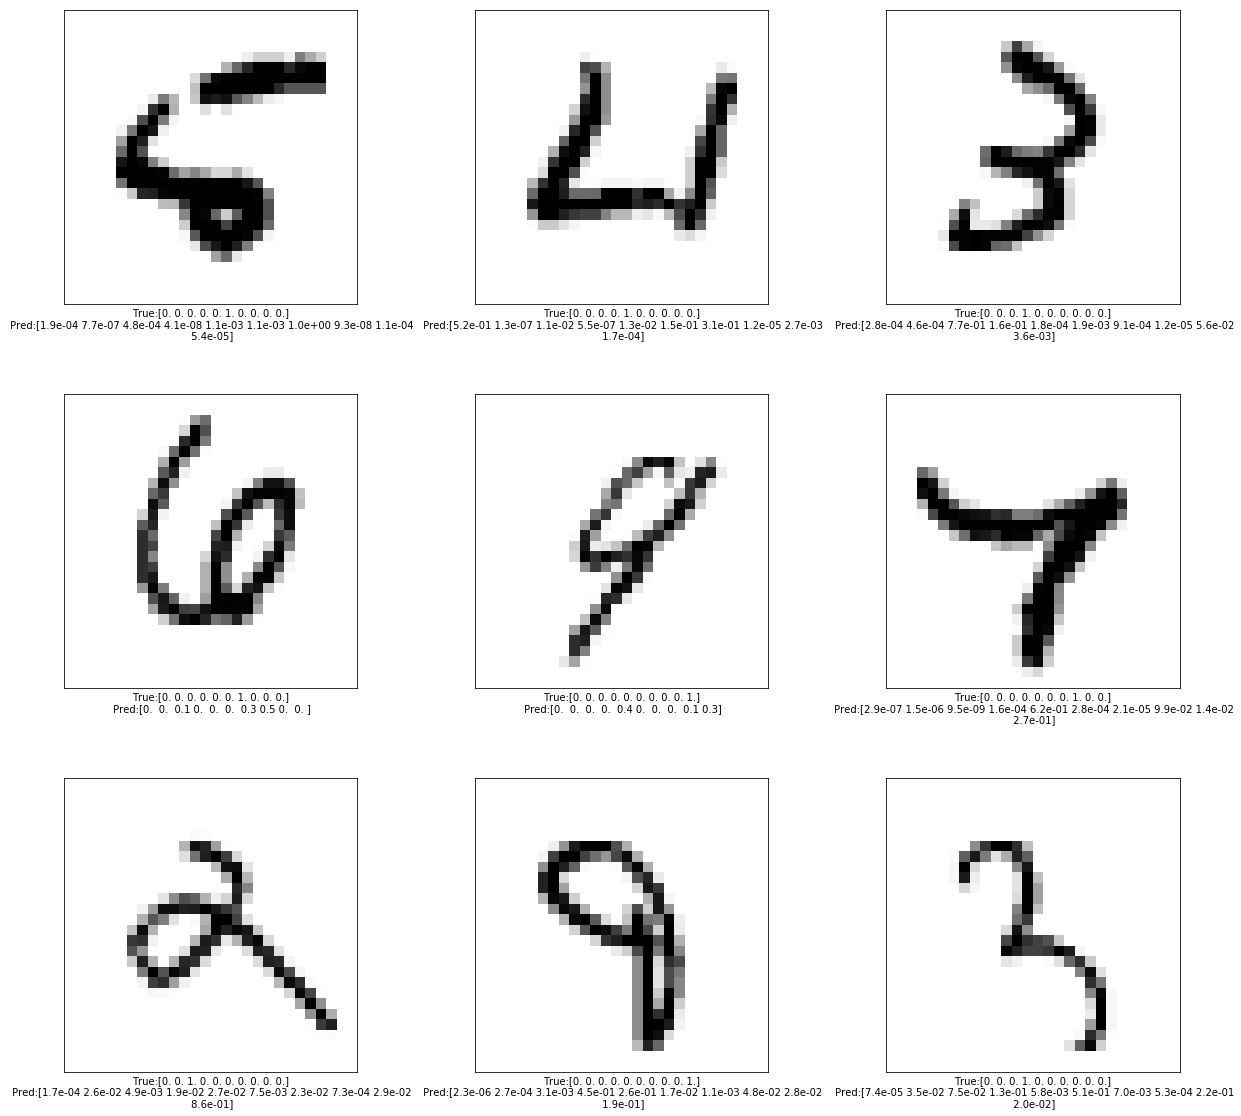

In [123]:
plot_example_errors()

-0.8193983 0.7987664


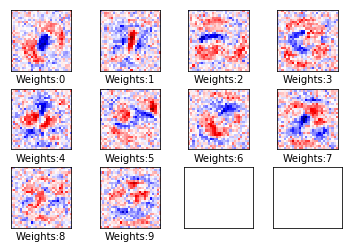

In [124]:
plot_weights()

[[ 961    0    2    1    0    8    6    1    1    0]
 [   0 1109    2    2    0    4    4    1   13    0]
 [   6    5  913   16    6    7   14    9   45   11]
 [   3    1   28  891    0   48    1   12   14   12]
 [   2    4    5    1  887    2   12    4    8   57]
 [  10    4    5   19    6  808    9    5   18    8]
 [  12    3    4    2    7   25  902    2    1    0]
 [   1    9   22    9    5    2    0  941    2   37]
 [  10    9    5   21    8   54    9   15  830   13]
 [   9    7    1    9   21   17    1   25    7  912]]


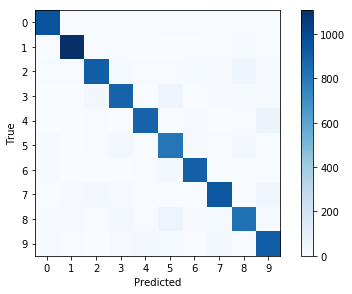

In [125]:
print_confusion_matrix()

In [55]:
session.close()

## 总结
1. 什么是混淆矩阵,可视化混淆矩阵
2. 可视化训练参数
3. 可视化预测错误样例
4. 打印预测精度
5. 